In [1]:
import numpy as np
print ('numpy version is ', np.__version__)
import matplotlib.pyplot as plt
#import mpl_toolkits.basemap
#print ('mpl_toolkits.basemap version is ', mpl_toolkits.basemap.__version__)
#from mpl_toolkits.basemap import Basemap
import warnings
import datetime
import dateutil.parser
import matplotlib
print ('Matplotlib version is ',matplotlib.__version__)
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import xarray as xr

numpy version is  1.21.2
Matplotlib version is  3.5.1


In [2]:
from API_client.python.lib.dataset import dataset
import dh_py_access.lib.datahub as datahub
from dh_py_access import package_api

In [7]:
server = 'http://api.planetos.com/v1/datasets/'
API_key = '5c99902cc2e14dfc8c3ca63864bf4a48'

In [8]:
dh=datahub.datahub_main(API_key)
fmi_hirlam_surface=dataset('fmi_hirlam_surface',dh)
metno_harmonie_metcoop=dataset('metno_harmonie_metcoop',dh)
gfs=dataset('noaa_gfs_pgrb2_global_forecast_recompute_0.25degree',dh)

AssertionError: 

In [5]:
dh=datahub.datahub_main(API_key)
fmi_hirlam_surface=dataset('fmi_hirlam_surface',dh)
metno_harmonie_metcoop=dataset('metno_harmonie_metcoop',dh)
gfs=dataset('noaa_gfs_global_sflux_0.12d',dh)

AssertionError: 

In [6]:
sample_var_names = {fmi_hirlam_surface:'Temperature_height_above_ground',
                    metno_harmonie_metcoop:'air_temperature_2m',
                    gfs:'tmp_m'}

NameError: name 'fmi_hirlam_surface' is not defined

In [26]:
sample_var_names[gfs]

'tmp_m'

In [27]:
area_name

'maximum_04'

In [6]:
today = datetime.datetime.today()
day_ago = today - datetime.timedelta(days=1)
reftime_start = datetime.datetime.strftime(day_ago, '%Y-%m-%dT') + '11:00:00'
reftime_end = datetime.datetime.strftime(day_ago, '%Y-%m-%dT') + '13:00:00'

In [7]:
def get_max_coverage_package(dataset, area_name, varfilter = 'temp'):
    """Download full coverage for limited area datasets"""
    coords = dataset.get_dataset_boundaries()
    ds_west = np.amin([i[0] for i in coords])
    ds_east = np.amax([i[0] for i in coords])
    ds_south = np.amin([i[1] for i in coords])
    ds_north = np.amax([i[1] for i in coords])
    temperature_variable = sample_var_names[dataset]
    assert len(temperature_variable) >= 1, "something wrong {0}".format(temperature_variable)
    assert type(temperature_variable) == str
    return package_api.package_api(dh,dataset.datasetkey,temperature_variable,ds_west,ds_east,ds_south,ds_north,area_name=area_name)

In [8]:
area_name = 'maximum_04'

In [9]:
package_harmonie = get_max_coverage_package(metno_harmonie_metcoop, area_name=area_name)
package_fmi_hirlam = get_max_coverage_package(fmi_hirlam_surface, area_name=area_name)

In [10]:
package_harmonie.make_package()
package_fmi_hirlam.make_package()

Package exists
Package exists


In [11]:
package_harmonie.download_package()
package_fmi_hirlam.download_package()

File already downloaded
File already downloaded


In [12]:
data_harmonie = xr.open_dataset(package_harmonie.get_local_file_name())
data_fmi_hirlam = xr.open_dataset(package_fmi_hirlam.get_local_file_name(),decode_cf=False)

In [31]:
left = np.amin(data_harmonie['longitude'].data)
right = np.amax(data_harmonie['longitude'].data)
bottom = np.amin(data_harmonie['latitude'].data)
top = np.amax(data_harmonie['latitude'].data)

package_gfs = package_api.package_api(dh,gfs.datasetkey,sample_var_names[gfs],left,right,bottom,top)
package_gfs.make_package()
package_gfs.download_package()

http://api.planetos.com/v1/packages?apikey=5c99902cc2e14dfc8c3ca63864bf4a48&dataset=noaa_gfs_pgrb2_global_forecast_recompute_0.25degree&package=noaa_gfs_pgrb2_global_forecast_recompute_0.25degree_recent_reftime_20220329_&z=all&polygon=%5B%5B-18.1224142667743%2C+49.765385397300214%5D%2C+%5B54.22758573322673%2C+49.765385397300214%5D%2C+%5B54.22758573322673%2C+75.21538539729877%5D%2C+%5B-18.1224142667743%2C+75.21538539729877%5D%2C+%5B-18.1224142667743%2C+49.765385397300214%5D%5D&reftime_recent=true&var=tmp_m


In [32]:
data_gfs = xr.open_dataset(package_gfs.get_local_file_name(),decode_cf=True)

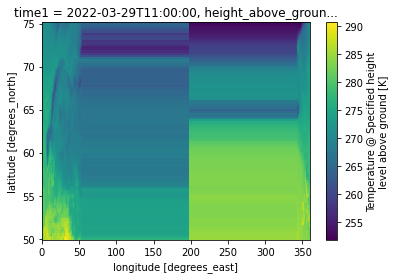

In [41]:
data_gfs.tmp_m[10][0].plot()

In [25]:
top

75.21538539729877

In [30]:
package_gfs